<h1 style="text-align: center; color: #007bff; font-size: 2em;">
    📘✏️ Create a <span style="color: #ff5733;">Linear Regression</span> Model from Scratch 🚀📊
</h1>

### Content
1. [Analysing what the Linear Regrresion model does](#1)
2. [Estimating the Loss](#2)
3. [Minimizing the Cost Function $J(w, b)$](#3)
4. [Gradient Descent and Finding the Best Fit](#4)
5. [Crating the Model](#5)

In [106]:
import numpy as np
import matplotlib.pyplot as plt

In [107]:
%matplotlib inline
plt.rcParams["figure.dpi"] = 90 
plt.style.use('Solarize_Light2')

<a name='1'></a>
### Analysing what the Linear Regrresion model does

We can think of this model as a neural network with one layer and one neuron, without an activation function. 
___

Now, let's take a neural network with its parameters already tuned and analyze what it does:

1. Takes an input matrix of the data with dimensions $\displaystyle (n, m) $.
2. Outputs an array for the prediction of a certain feature.
3. The prediction is generated by creating a linear graph that emulates the patterns in the data as accurately as possible.
___

`create_linear_data` takes in n=features and m=samples
Then returns $X$ a matrix of shape $(n, m)$ and $y$ a column vector of length $m$ with a linear relationship to $X$.

In [108]:
from NumpyDataset import create_linear_data
X, y = create_linear_data(5, 100, seed=42)

Lets make a function that generates the $w$ and $b$ parameters:

In [109]:
def generate_params(dim):
    ''' Takes as input the amount of fetures in the training set (n)'''
    w = np.zeros((dim, 1))
    b = 0.0
    return w, b

In [110]:
w, b = generate_params(X.shape[0])

print(f'w: {w.tolist()}, shape: {w.shape}')
print(f'b: {b}, shape: scalar')

w: [[0.0], [0.0], [0.0], [0.0], [0.0]], shape: (5, 1)
b: 0.0, shape: scalar


___
#### Vectorised Linear Function
So lets make a function that takes as input $X, w, b$ and output the prediction $\hat{y}$
$$
\displaystyle
\hat{y} = w^Tx + b \quad \quad \Longrightarrow \quad \quad \hat{y} = 
\begin{pmatrix} 
    w_1 \\ 
    \vdots\\
    \vdots\\
    w_{n} 
\end{pmatrix}^T
\begin{pmatrix} 
    x_{1, 1} & \vdots & \vdots & \vdots & x_{1, m}\\
       \vdots & \vdots & \vdots & \vdots & \vdots \\
    x_{n, 1} & \vdots & \vdots & \vdots & x_{m, n}\\
\end{pmatrix}
+ b
$$

In [111]:
def predict(X, w, b):
    return np.dot(w.T, X) + b

In [112]:
y_hat = predict(X, w, b)
print(f'y_hat: {y_hat.shape}')

y_hat: (1, 100)


<a name='2'></a>
### Estimating the Loss
now that we know how to predict data we need a way to train the model to find the optimal values for $w$ and $b$
* so how could we check what line fits the data best?
for knowing which is the best line we could check how far away is from evry datapoint in the training set. or in other words the difference between $y$ and $\hat{y}$.
* $y$ is a vector of all the true values and $\hat{y}$ is a vector of all of the predicted values.

the formula for this will be taking the L2 norm of $\displaystyle||y - \hat{y}||_2$ which is $\displaystyle\frac{1}{m}\sum_{i=1}^{m}(y_i - \hat{y}_i)^2$

In [113]:
def mse_cost(y, y_hat):
    ''' Mean Squared Error (MSE) cost function '''
    return np.mean((y - y_hat)**2)

In [114]:
print(f'Mean Squared Error: {mse_cost(y, y_hat)}')

Mean Squared Error: 2.9507670771689294


If the parematers $w, b$ are set to $0$ then we will get the cost of the line $y = 0$ or just $\space\displaystyle\frac{1}{m}\sum_{i=1}^m{y_i^2}$
___

<a name='3'></a>
### Minimizing the Cost Function $J(w, b)$
now we have a function that claculates the fit of a certaine line, the next step is to minimize the cost function to find the optimal valus for $w$ and $b$.
to find the minimun value for each parameter we take the derivative of it with respect to the cost function



<div style="border-left: 4px solid #007bff; padding: 10px; background-color: #cce5ff; color: #004085;">
📘 <b>Note:</b> the intuition for this is that when $\frac{\partial{J}}{\partial{b}}, \frac{\partial{J}}{\partial{w}}$ $\to{0}$ you have found the best values for $w$ and $b$
</div>

so lets take the derivative of each parameter with respect to the cost function. this will yeild a metric of estimating when is the best fit.
$\displaystyle J(w, b) = \frac{1}{m}\sum\left(y - (w^Tx + b)\right)^2$

$\displaystyle\frac{\partial{J}}{\partial{w}} = \frac{1}{m}\sum2(y - (w^Tx +b))^{2-1}\frac{\partial}{\partial{w}}(y - (w^Tx + b)) \to \frac{1}{m}\sum2(y - (w^Tx + b))(-x) \to \color{#cce5ff}{\frac{-2}{m} \sum{x(y - w^Tx - b))}}$

$\displaystyle\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum2(y - (w^Tx + b)^{2-1}  \frac{\partial}{\partial{b}}(y - (w^Tx + b) \to \frac{1}{m}\sum-2(y - (w^Tx + b)) \to \color{#cce5ff}{\frac{-2}{m}\sum(y - w^Tx - b))}$

In [115]:
def compute_gradiants(w, b, X, y):
    ''' returns a dictionary of dw, db and the mse cost '''
    m = len(y)
    y_hat = np.dot(w.T, X) + b
    
    dw = (-2/m) * np.sum(X*(y - y_hat))
    db = (-2/m) * np.sum((y - y_hat))
                         
    grads = {'dw': dw, 'db': db}
    cost = mse_cost(y, y_hat)
    
    return grads, cost

Run `compute_gradients(w, b, X, y)` to see the derivatives of $w$, $b$ for our cost function $\mid$ The larger the gradiant the further away we are minimum

In [116]:
grads, cost = compute_gradiants(w, b, X, y)
print(f'cost: {cost}\n{grads}')

cost: 2.9507670771689294
{'dw': -877.0350672295224, 'db': -333.92339646787275}


<a name='4'></a>
### Gradient Descent and Finding the Best Fit
Now that we have a way of getting the derivative we need a way of reaching the best fit. This is done with an alogorithem called gradiant decent.

Gradiant decent is an algorithem that pushes the values of $w, b$ in the right direction.
___

What this mean is that we go through a loop that runs a certain amount of times, and each time we calculate $\frac{\partial{J}}{\partial{w}}, \frac{\partial{J}}{\partial{b}}$. which we know are the slopes of the function $J(w, b)$ so if we think of the function $J$ as a hill, the negative of the slope tells us which way is down.
___

What gradiant decent does is push $w, b$ by $-\alpha$ (aka: learning rate) times $\frac{\partial{J}}{\partial{w}} , \frac{\partial{J}}{\partial{b}}$. or in other words we push $w, b$ down hill to reach best fit. 
> In each loop we do the folloing operation - 

$$
b = b -\alpha\left(\frac{\partial{J}}{\partial{b}}\right) \quad w = w -\alpha\left(\frac{\partial{J}}{\partial{w}}\right)
$$

In [117]:
def gradiant_decent(w, b, X, y, learning_rate=0.001, epochs=1000):
    ''' Rreturns the optimal patameters for w and b and a dictionary conatining the changing cost per 100 loops.'''
    costs_dict = {}
    for i in range(epochs):
        grads, cost = compute_gradiants(w, b, X, y)
        w -= learning_rate * grads['dw']
        b -= learning_rate * grads['db']
        
        if i % 1 == 0:
            costs_dict[i] = cost
            
    return w, b, costs_dict

___
Lets run `gradiant_decent` and see how much better the line fits that data
___

In [118]:
w, b, costs_dict = gradiant_decent(w, b, X, y, learning_rate=0.00001, epochs=250)
new_cost = list(costs_dict.items())[-1][1]

print(f'Cost without gradiant decent: {cost}')
print(f'Cost with gradiant decent: {new_cost}')

Cost without gradiant decent: 2.9507670771689294
Cost with gradiant decent: 0.029137973164975392


<a name='5'></a>
### Crating the Model
Now we have every thing we need to create and train the linear regreesion model. 
>Lets create a class to better track the training process, and see the model in action.

In [119]:
class Regression:
    def __init__(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
        self.features = self.X_train.shape[0]
        self.w, self.b = generate_params(self.features)
        
    def fit(self, learning_rate=0.001, epochs=1000):
        self.w, self.b = generate_params(self.features)
        self.w, self.b, self.costs_dict = gradiant_decent(self.w, self.b, self.X_train, self.y_train, learning_rate, epochs)
        

In [120]:
def plot_learning_curve(costs_dict):
    items = costs_dict.items()
    iterations = [item[0] for item in items]
    cost = [item[1] for item in items]
        
    fig, ax = plt.subplots(figsize=(7, 4))
    ax.plot(iterations, cost)
        
    ax.set_title('Cost Decrease per Iteration')
    ax.set_ylabel('Cost')
    ax.set_xlabel('Iterations')
        
    plt.tight_layout()

In [121]:
my_regression_model = Regression(X, y)

In [122]:
my_regression_model.fit(learning_rate=0.00001, epochs=250)

In [123]:
print(f'w: {my_regression_model.w.tolist()}, shape: {my_regression_model.w.shape}')
print(f'b: {my_regression_model.b}, shape: scalar')

w: [[0.5695752404069859], [0.5695752404069859], [0.5695752404069859], [0.5695752404069859], [0.5695752404069859]], shape: (5, 1)
b: 0.21545018650438647, shape: scalar


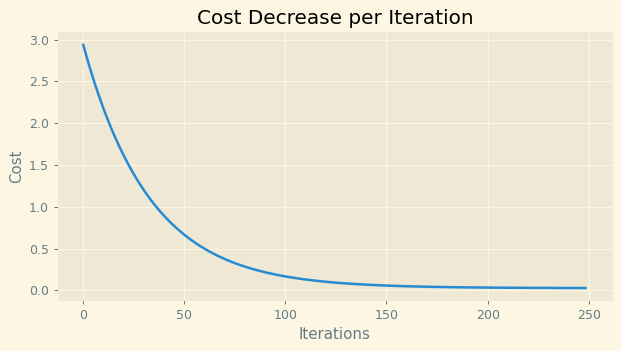

In [124]:
plot_learning_curve(my_regression_model.costs_dict)

In [151]:
import tensorflow as tf
# importing the Sequential model with the Dense layers for the most basic nn implementation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [159]:
tesorflow_regression_model = Sequential([
   Dense(1, activation='linear', name='linear_regression')
])

In [166]:
from tensorflow.keras.optimizers.legacy import SGD
optimizer = SGD(learning_rate=0.00001)
tesorflow_regression_model.compile(optimizer=optimizer, loss='mse')

In [168]:
X = X.T
y = y = np.array(y).reshape(-1, 1)
X.shape, y.shape

((100, 5), (100, 1))

In [ ]:
tesorflow_regression_model.fit(X, y, epochs=250)

In [171]:
layer = tesorflow_regression_model.get_layer('linear_regression')

In [180]:
layer.weights

[<tf.Variable 'linear_regression/kernel:0' shape=(5, 1) dtype=float32, numpy=
 array([[ 0.6635606 ],
        [-0.8140924 ],
        [ 0.9115015 ],
        [-0.02678077],
        [ 0.27697855]], dtype=float32)>,
 <tf.Variable 'linear_regression/bias:0' shape=(1,) dtype=float32, numpy=array([0.03233215], dtype=float32)>]

In [185]:
{'w': my_regression_model.w, 'b': my_regression_model.b}

{'w': array([[0.56957524],
        [0.56957524],
        [0.56957524],
        [0.56957524],
        [0.56957524]]),
 'b': 0.21545018650438647}